In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("ciccese.csv",header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.head()

,anio,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,253,2016-01-01 00:00:00
1,2016,1,1,1,221,2016-01-01 01:00:00
2,2016,1,1,2,223,2016-01-01 02:00:00
3,2016,1,1,3,265,2016-01-01 03:00:00
4,2016,1,1,4,342,2016-01-01 04:00:00


In [5]:
df.columns

Index(['anio', 'mes', 'dia', 'hora(utc)', 'altura(mm)', 'date'], dtype='object')

In [6]:
df.columns=['anio','mes','dia','hora(utc)','altura(mm)','date']

In [7]:
df.apply(lambda x: sum(x.isnull()),axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
date          0
dtype: int64

In [8]:
df.head(), df.tail()

(   anio  mes  dia  hora(utc)  altura(mm)                date
 0  2016    1    1          0         253 2016-01-01 00:00:00
 1  2016    1    1          1         221 2016-01-01 01:00:00
 2  2016    1    1          2         223 2016-01-01 02:00:00
 3  2016    1    1          3         265 2016-01-01 03:00:00
 4  2016    1    1          4         342 2016-01-01 04:00:00,
       anio  mes  dia  hora(utc)  altura(mm)                date
 1435  2016    2   29         19         414 2016-02-29 19:00:00
 1436  2016    2   29         20         383 2016-02-29 20:00:00
 1437  2016    2   29         21         339 2016-02-29 21:00:00
 1438  2016    2   29         22         305 2016-02-29 22:00:00
 1439  2016    2   29         23         291 2016-02-29 23:00:00)

In [9]:
z = np.arange(0.0, 1440.0, 1.0)

In [10]:
df['T'] =  pd.Series(z, index =None)

In [11]:
df.head(), df.tail()

(   anio  mes  dia  hora(utc)  altura(mm)                date    T
 0  2016    1    1          0         253 2016-01-01 00:00:00  0.0
 1  2016    1    1          1         221 2016-01-01 01:00:00  1.0
 2  2016    1    1          2         223 2016-01-01 02:00:00  2.0
 3  2016    1    1          3         265 2016-01-01 03:00:00  3.0
 4  2016    1    1          4         342 2016-01-01 04:00:00  4.0,
       anio  mes  dia  hora(utc)  altura(mm)                date       T
 1435  2016    2   29         19         414 2016-02-29 19:00:00  1435.0
 1436  2016    2   29         20         383 2016-02-29 20:00:00  1436.0
 1437  2016    2   29         21         339 2016-02-29 21:00:00  1437.0
 1438  2016    2   29         22         305 2016-02-29 22:00:00  1438.0
 1439  2016    2   29         23         291 2016-02-29 23:00:00  1439.0)

In [12]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 1440
# sample spacing
T = 1.0
y = df["altura(mm)"]/1000.0
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

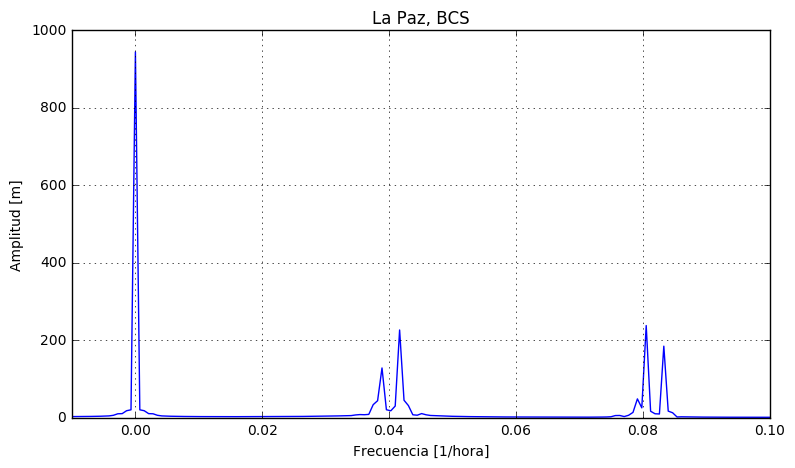

In [13]:
N = 1440
T = 1.0
#aplicacion de la transformada de Fourier
y = df["altura(mm)"] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('La Paz, BCS')

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

In [14]:
a=2*np.absolute(yf)/N

In [15]:
print(np.where(a[:,] > 100))
b=a[a[:,] > 100]
b

(array([   0,   56,   60,  116,  120, 1320, 1324, 1380, 1384]),)


array([ 943.58055556,  127.83730751,  225.86367938,  237.27938345,
        184.06517717,  184.06517717,  237.27938345,  225.86367938,
        127.83730751])

In [16]:
#Amplitudes notorias, fueron ubicadas en la actividad 6
A0_s = np.absolute(yf[int(0),]/N)
A3_s= 2.0*np.absolute(yf[int(56),]/N)
A6_s = 2.0*np.absolute(yf[int(60),]/N)
A9_s = 2.0*np.absolute(yf[int(116),]/N)
A10_s = 2.0*np.absolute(yf[int(120),]/N)
#PERIODOS

f_A3s =  xf[int(720 +56),]
f_A6s =  xf[int(720 +60),]
f_A9s =  xf[int(720 +116),]
f_A10s =  xf[int(720 +120),]

#FASES
qA0s = np.angle(yf[int(0),])
qA3s = np.angle(yf[int(56),])
qA6s = np.angle(yf[int(60),])
qA9s = np.angle(yf[int(116),])
qA10s = np.angle(yf[int(120),])



In [18]:
y= df['altura(mm)']/1000
w= 2.0*np.pi
a=0
def f(t):
    return A0_s  + (A3_s*np.cos(w*f_A3s*t+qA3s) + A6_s*np.cos(w*f_A6s*t+qA6s) 
                  + A9_s*np.cos(w*f_A9s*t+qA9s) + A10_s*np.cos(w*f_A10s*t+qA10s))

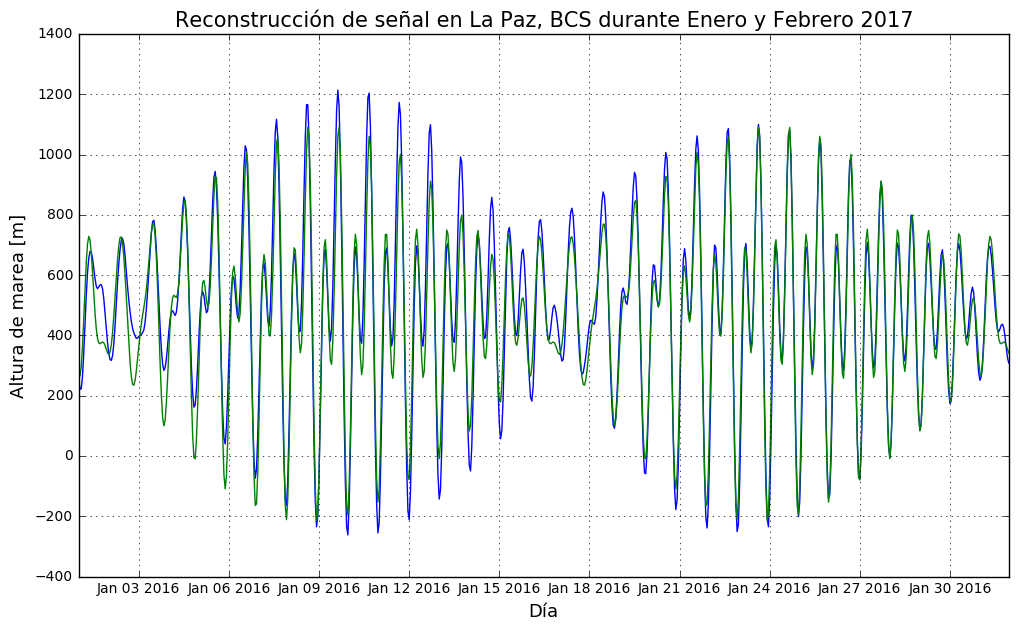

In [36]:
plt.plot(df['date'], df[u'altura(mm)'], 'b-', label ="Altura")
plt.plot(df['date'], f(df['T']), 'g-', label='Altura reconstruida')
plt.xlim(pd.Timestamp("2016-01-01 0:00"), pd.Timestamp('2016-01-31 23:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Reconstrucción de señal en La Paz, BCS durante Enero y Febrero 2017', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(12, 7)
plt.show()

In [37]:
y0=df['altura(mm)']
y1=f(df['T'])

In [38]:
#ERROR RELATIVO
print()
sum(abs(y0-y1)**2) / sum(abs(y0)**2)

0.022276137160785657